In [1]:
import warnings
warnings.filterwarnings('ignore')

# to export to HTML, run in Anaconda:
# cd "C:\Users\MK Bunyi\Box\PPOL566 - DS3\Python Package Presentation"
# jupyter nbconvert python_package_networkx.ipynb --to slides --post serve  --SlidesExporter.reveal_scroll=True

# Python Library Presentation
## NetworkX

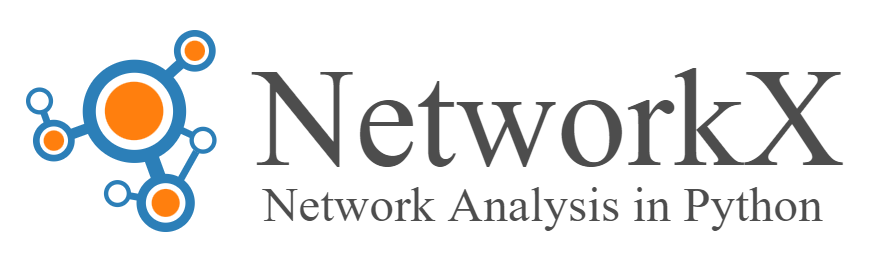


Presented by:  
Mary Kryslette Bunyi  
10 November 2021

### Network Analysis

Networks are manifested in a variety of fields such as **social media**, **global value chains**, **disease outbreaks**, and **internet browsing**. Network analysis may allow us to:
* determine important actors/pieces within an organization/system
* identify clusters and analyze interconnectivity within a network
* predict a network's future direction
<b> <center> Political blogs prior to the 2004 US Presidential election  </center> </b>
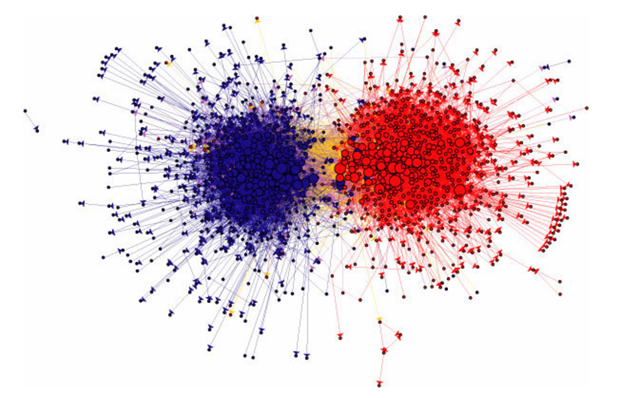

### Graph Network
* **Nodes**: entities of interest
    - people, organizations, concepts, database tables/relations
* **Edges**: relationships between the nodes
    - may be directional, may represent different types of links within the same network, and may carry weight
    - financial transactions, workplace hierarchy, or shared keys between database tables
<b> <center>  Simple network graph + Node and Edge lists </center> </b>
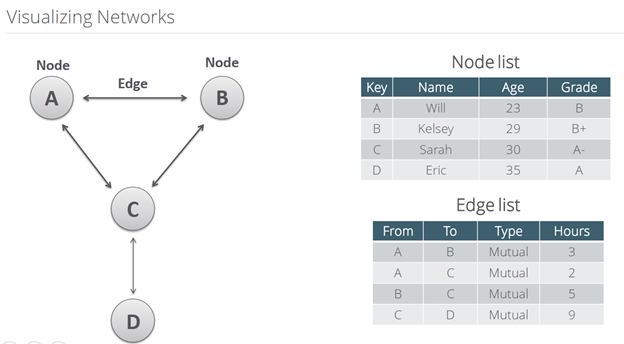

### NetworkX
* creating, manipulating, visualizing, and studying the structure, dynamics, and functions of complex networks
* can handle up to 10 million nodes and 100 million edges

#### Functionalities:
* generate random and classic networks
* analyze network structure
* build network models
* design new network algorithms
* draw networks  

#### Note: Primarily for graph analysis (not graph viz)
* basic drawing functionalities using Matplotlib
* appropriate for simpler networks or for exploratory data analysis
* for more advanced graph viz, use dedicated fully-featured tools like [Graphviz](https://graphviz.org/)

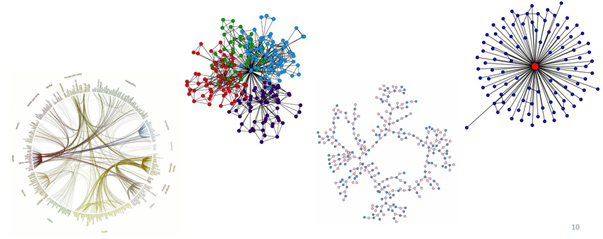

#### Installation
NetworkX requires Python 3.7 or newer.

To install the latest release of the package, run `pip install networkx[default]`.

To install the package without the dependencies (e.g., numpy, scipy), run `pip install networkx`.

Alternatively, manual downloads are also possible through Network's [GitHub](https://github.com/networkx/networkx/releases) or [PyPI](https://pypi.python.org/pypi/networkx) repositories. 

#### Simple Plotting

Graph creation is fundamentally comprised of 5 steps:
1. NetworkX package import: &emsp; &emsp; `import networkx as nx`
1. Create the graph object: &emsp; &emsp; `g = nx.Graph()`
1. Add nodes*: &emsp; &emsp;&emsp;  `g.add_node(node)` 
1. Add edges: &emsp; &emsp;&emsp; `g.add_edge(node_1, node_2)`
1. Draw the graph: &emsp; &emsp; `nx.draw(g)`

*Note*: Step 3 may be skipped as nodes will automatically be created when edges are created between non-existent nodes.

In [2]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

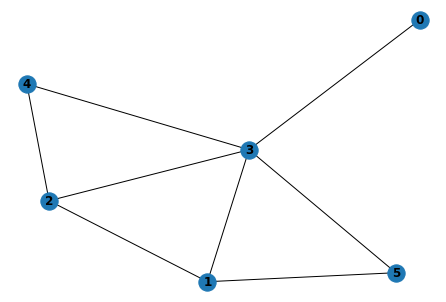

In [3]:
# Create a networkx graph object
my_graph = nx.Graph() 
 
# Add edges to to the graph object
# Each tuple represents an edge between two nodes
my_graph.add_edges_from([
                        (1,2), 
                        (1,3), 
                        (3,4), 
                        (1,5), 
                        (3,5),
                        (4,2),
                        (2,3),
                        (3,0)])
 
# Draw the resulting graph
nx.draw(my_graph, with_labels=True, font_weight='bold')

#### Importing Network Data from a DataFrame (using `from_pandas_edgelist`)

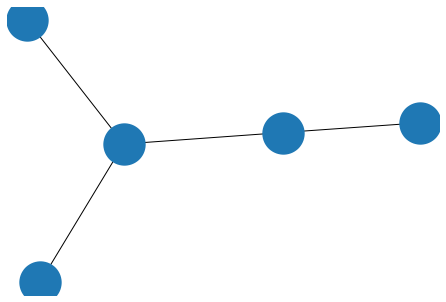

In [4]:
# create a dataframe
df = pd.DataFrame({'from': ['A', 'B', 'C', 'A'], 
                   'to': ['D', 'A', 'E', 'C']})
# create graph object
G = nx.from_pandas_edgelist(df, 'from', 'to')
# plot the network graph
nx.draw(G, with_labels=False, node_size=500, alpha=1, linewidths=20)

#### Tweaking node coordinates (using `pos`) and graph elements (`matplotlib` integration)

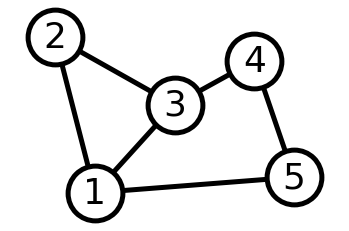

In [5]:
# create nodes and edges
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5}

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

#### **Directed (i.e., Directional) graph** (`DiGraph`)
The source node must be specified before the target node

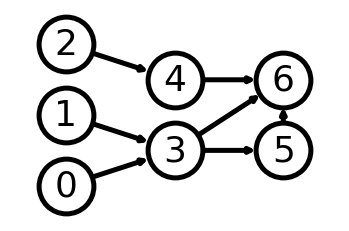

In [6]:
# create graph object
G = nx.DiGraph([(0, 3), (1, 3), (2, 4), (3, 5), (3, 6), (4, 6), (5, 6)])

# group nodes by column
left_nodes = [0, 1, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

# set the position according to column (x-coord)
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()


### Crude Visualization Exercise

**[Marvel Cinematic Universe Social Network data](https://public.tableau.com/app/profile/harpreetghuman/viz/TheMarvelSocialNetwork/MSN) from Tableau**

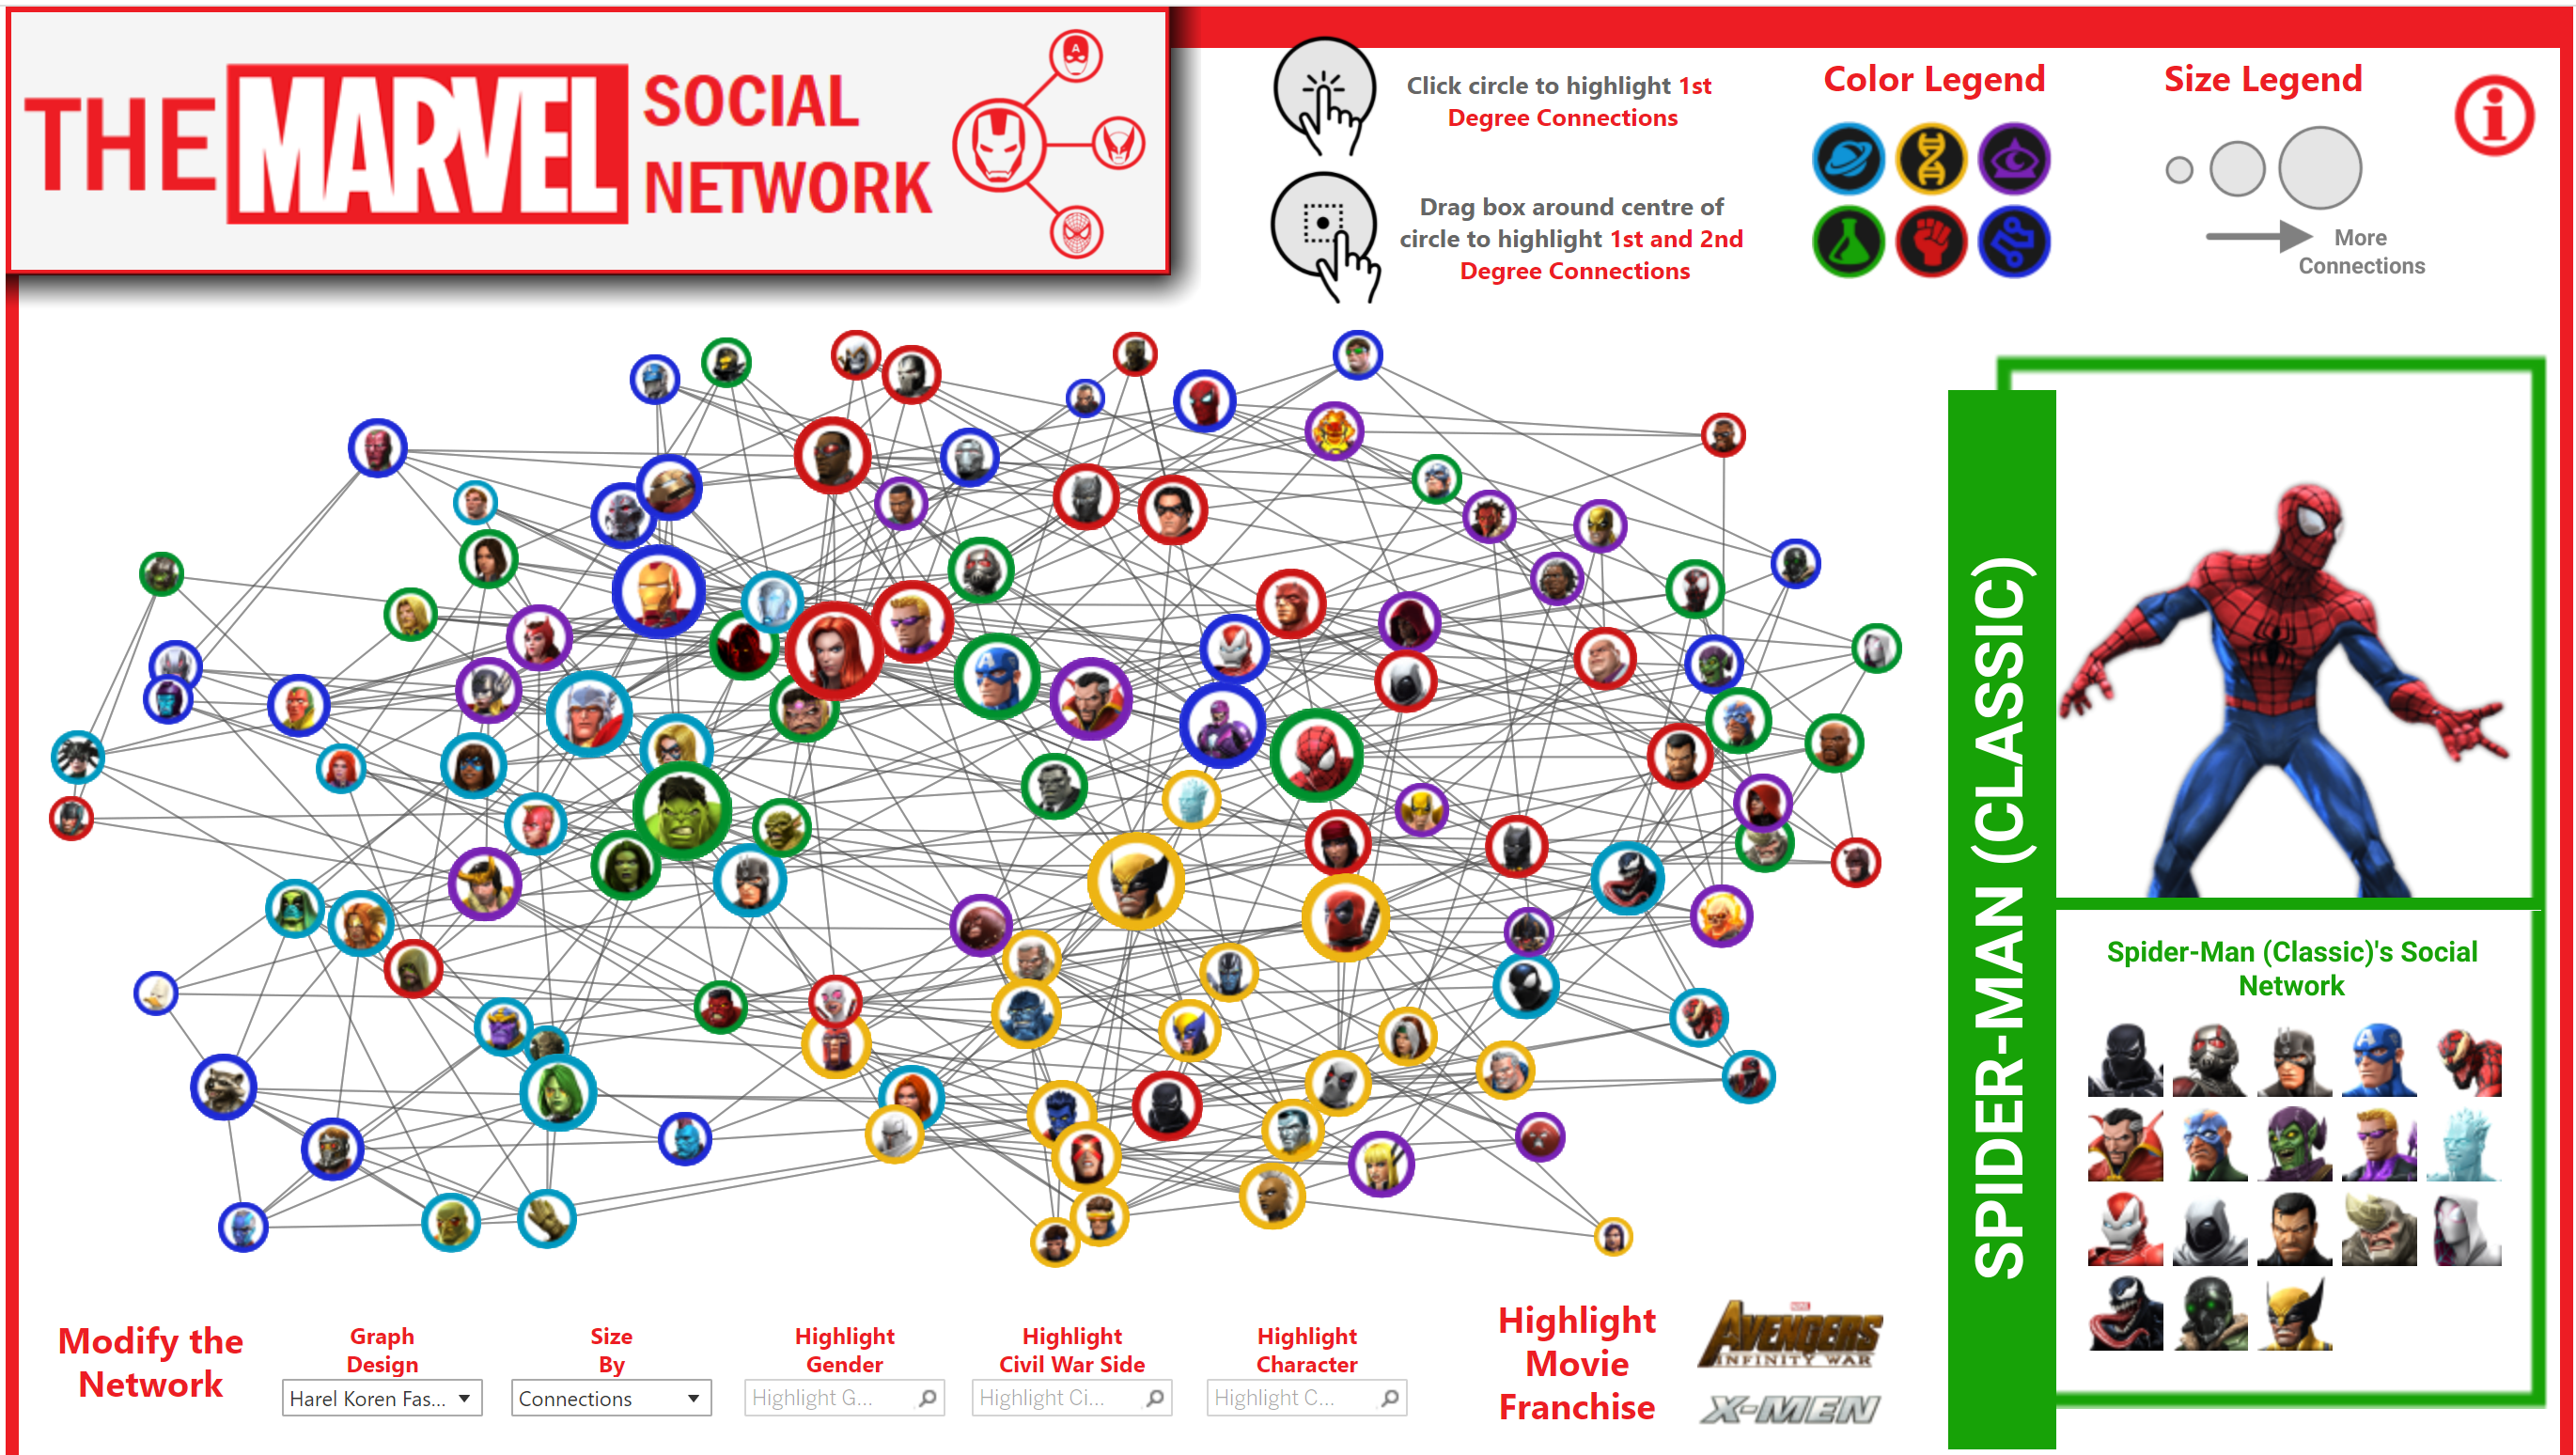

In [7]:
# import data
msn = pd.read_csv("https://github.com/mkbunyi/Data-Viz-Tutorial-NetworkX/raw/main/marvel_social_network.csv")
msn.head()

Character Name  Line ID  Path Ch Name Diff  Character ID  \
0    Abomination        1     1          NaN             1   
1          Rhino        1     2        Rhino            83   
2    Abomination        2     1          NaN             1   
3           Hulk        2     2         Hulk            45   
4    Abomination        3     1          NaN             1   

  Character Name (copy) Main Character Name in Caps Relation  \
0           Abomination    Abomination  ABOMINATION  Friends   
1                 Rhino    Abomination        RHINO  Friends   
2           Abomination    Abomination  ABOMINATION  Nemesis   
3                  Hulk    Abomination         HULK  Nemesis   
4           Abomination    Abomination  ABOMINATION  Enemies   

  Relation - Negative  ... Relation Sentiment  \
0                 NaN  ...           Positive   
1                 NaN  ...           Positive   
2                 NaN  ...           Negative   
3             Nemesis  ...           Negative   
4                 NaN  ...           Negative   

                       Relationship Set ID Synergy Type URL  1  \
0                               NaN      1   Reciprocal NaN  1   
1  Relationship with Abomination -       1   Reciprocal NaN  1   
2                               NaN      1      Perfect NaN  1   
3  Relationship with Abomination -       1      Perfect NaN  1   
4                               NaN      1       Normal NaN  1   

  Number of Records  S.No.            X            Y  
0                 1      1  6581.620117  2663.285156  
1                 1      2  7942.243652  9485.032227  
2                 1      3  6581.620117  2663.285156  
3                 1      4  4651.433594  5910.624023  
4                 1      5  6581.620117  2663.285156  

[5 rows x 25 columns]

###### Reformat the data from "long" to "wide" format

In [8]:
# reformat to combine linked characters in 1 row

# collapse rows by line ID and combine linked characters in a list per cell
msn_nx = msn.groupby('Line ID').agg(lambda x: x.tolist())
msn_nx = msn_nx[["Character Name","Character ID"]]

# split list and allocate separate columns for the linked characters
msn_nx = pd.concat([msn_nx["Character Name"].apply(pd.Series),
          msn_nx["Character ID"].apply(pd.Series)],
          axis=1).reset_index()        

# add relation type
msn_nx = msn_nx.merge(msn[["Line ID","Relation","Relation Sentiment"]],
            on="Line ID", how = "left").drop_duplicates()

# rename columns
msn_nx.columns = ['Line ID', 'Char1_Name', 'Char2_Name', 'Char1_ID', 'Char2_ID', 'Relation', 'Relation Sentiment']

# reset index
msn_nx = msn_nx.reset_index()

# set color according to relation sentiment
msn_nx['color'] = np.where(msn_nx['Relation Sentiment']=="Positive",
                          "green",
                          "black")
msn_nx['color'] = np.where(msn_nx['Relation Sentiment']=="Negative",
                          "red",
                          msn_nx['color'])

In [9]:
# view reformatted data
msn_nx.head()

index  Line ID   Char1_Name  Char2_Name  Char1_ID  Char2_ID Relation  \
0      0        1  Abomination       Rhino         1        83  Friends   
1      2        2  Abomination        Hulk         1        45  Nemesis   
2      4        3  Abomination    She-Hulk         1        90  Enemies   
3      6        4  Abomination    Red Hulk         1        82  Enemies   
4      8        5  Abomination  King Groot         1        59  Friends   

  Relation Sentiment  color  
0           Positive  green  
1           Negative    red  
2           Negative    red  
3           Negative    red  
4           Positive  green

##### Create graph object

In [10]:
# Initialize a graph object
G = nx.from_pandas_edgelist(msn_nx,
                            'Char1_Name', 
                            'Char2_Name',
                            edge_attr=["Relation","Relation Sentiment"])

In [11]:
# Generate layout for visualization
pos = nx.kamada_kawai_layout(G)

In [12]:
# Manual position tweaking
pos["Captain America"] += (0, -1)

#### Tweaking node size
We will set node size proportional to the number of links.

In [13]:
# node size is proportional to number of links
links=dict.fromkeys(G.nodes(),0.0)
for (node1,node2,attrib) in G.edges(data=True):
    links[node1]+=1
    links[node2]+=1

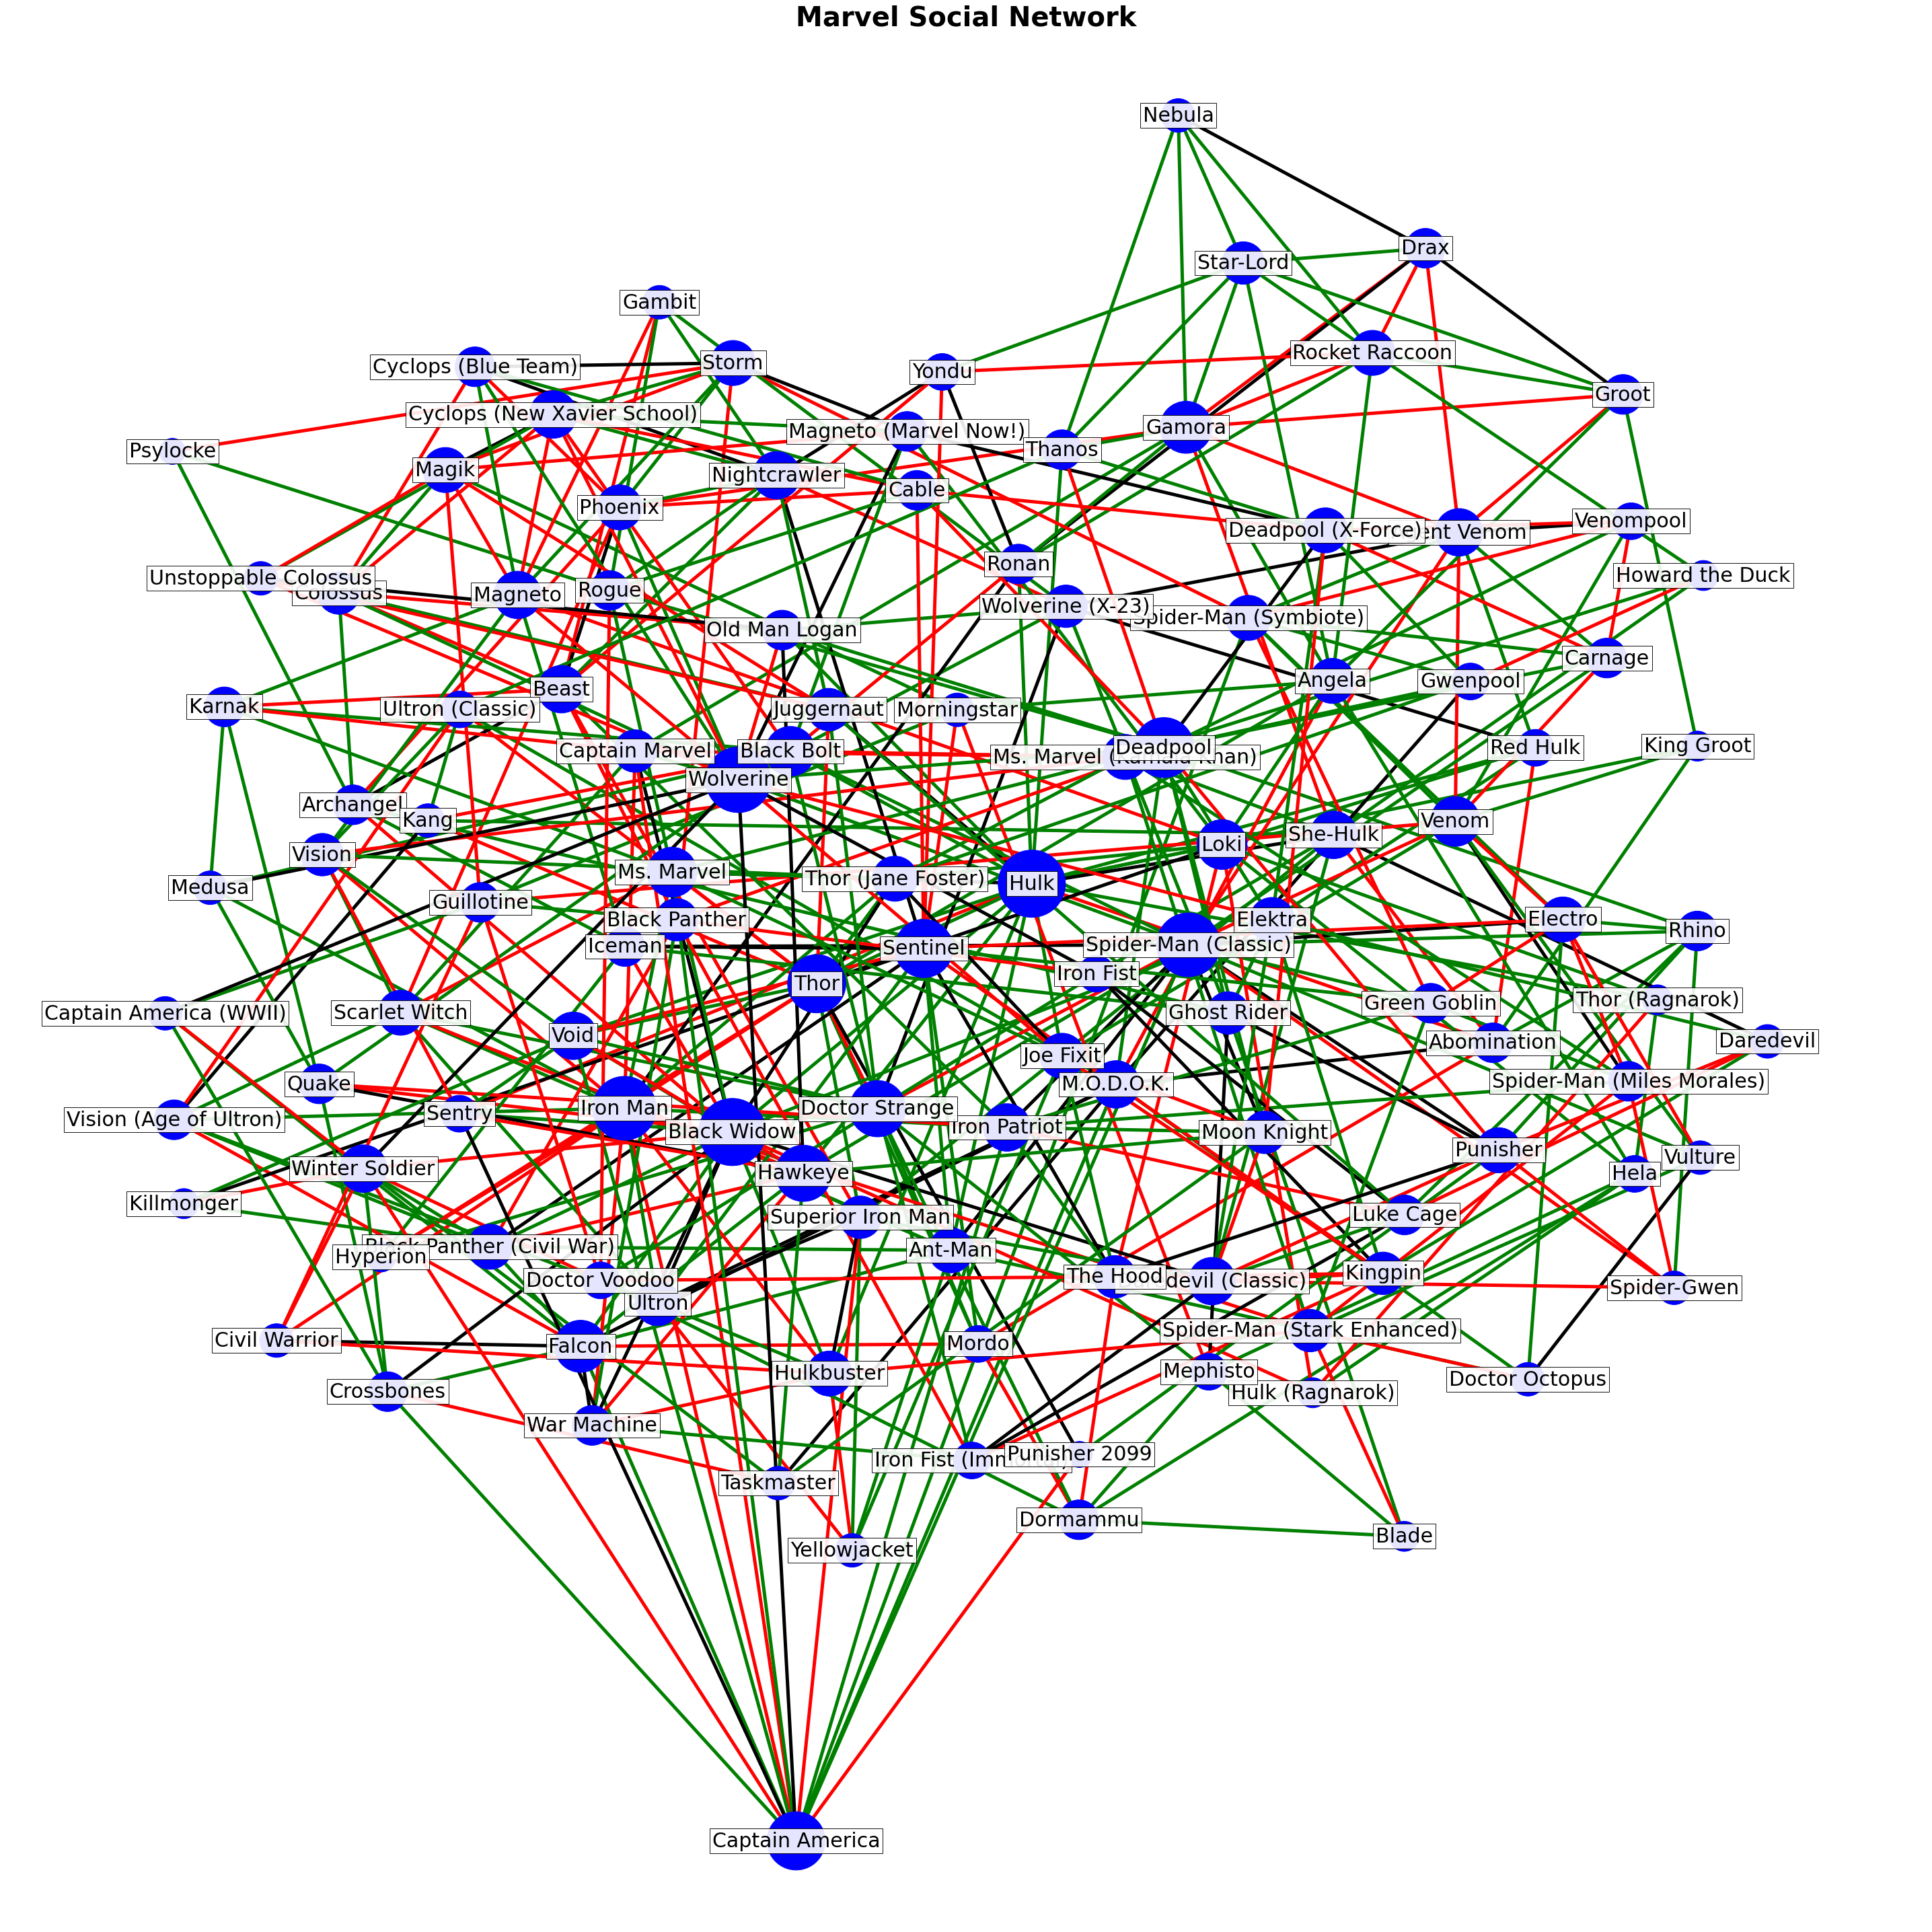

In [14]:
fig, ax = plt.subplots(figsize=(40, 40))

# draw edges
nx.draw_networkx_edges(G, pos, alpha=1, width=5,
                       edge_color=[msn_nx["color"][i] for i in list(range(len(msn_nx)))])

# draw nodes
nx.draw_networkx_nodes(G, pos,
                       node_size = [links[i]*500 for i in G],
                       node_color="blue", alpha=1,
                       label=[msn_nx["Char1_Name"][i] for i in list(range(len(msn_nx)))])

# draw labels
label_options = {"ec": "black", "fc": "white", "alpha": .9}
nx.draw_networkx_labels(G, pos, font_size=30, bbox=label_options)

# display title
font = {"color": "black", "fontweight": "bold", "fontsize": 40}
ax.set_title("Marvel Social Network", font)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

#### Subsetting and NetworkX's graph analysis functions

In [15]:
# initialize
top_links = {}

# iterate through nodes to count connections
for char in G.nodes:
    top_links[char] = len(G[char])
    
# convert to dataframe
s = pd.Series(top_links, name='connections')
df = s.to_frame().sort_values('connections', ascending=False)
df

connections
Black Widow                    20
Hulk                           20
Wolverine                      19
Spider-Man (Classic)           18
Iron Man                       18
...                           ...
King Groot                      4
Blade                           4
Killmonger                      4
Punisher 2099                   3
Psylocke                        3

[118 rows x 1 columns]

In [16]:
msn_blackwidow = msn_nx[msn_nx["Char1_Name"]=="Black Widow"].reset_index()
msn_blackwidow

level_0  index  Line ID   Char1_Name                 Char2_Name  Char1_ID  \
0        80    160       81  Black Widow                  Archangel        10   
1        81    162       82  Black Widow  Black Panther (Civil War)        10   
2        82    164       83  Black Widow             Captain Marvel        10   
3        83    166       84  Black Widow                 Crossbones        10   
4        84    168       85  Black Widow        Daredevil (Classic)        10   
5        85    170       86  Black Widow                    Elektra        10   
6        86    172       87  Black Widow                     Falcon        10   
7        87    174       88  Black Widow                    Hawkeye        10   
8        88    176       89  Black Widow                       Hulk        10   
9        89    178       90  Black Widow            Hulk (Ragnarok)        10   
10       90    180       91  Black Widow                 Hulkbuster        10   
11       91    182       92  Black Widow                     Iceman        10   
12       92    184       93  Black Widow                 Ms. Marvel        10   
13       93    186       94  Black Widow                      Quake        10   
14       94    188       95  Black Widow                     Sentry        10   
15       95    190       96  Black Widow         Thor (Jane Foster)        10   
16       96    192       97  Black Widow                     Ultron        10   
17       97    194       98  Black Widow                       Void        10   
18       98    196       99  Black Widow                War Machine        10   
19       99    198      100  Black Widow             Winter Soldier        10   

    Char2_ID               Relation Relation Sentiment  color  
0          5              Teammates           Positive  green  
1          9                Friends           Positive  green  
2         15                Friends           Positive  green  
3         19                 Rivals           Negative    red  
4         23                Romance           Positive  green  
5         32                 Rivals           Negative    red  
6         33                Enemies           Negative    red  
7         41                Romance           Positive  green  
8         45               Avengers           Positive  green  
9         46                Lullaby           Positive  green  
10        47               Avengers           Positive  green  
11        49              Teammates           Positive  green  
12        72                Friends           Positive  green  
13        81  S.H.I.E.L.D Clearance            Neutral  black  
14        89                Friends           Positive  green  
15       102                Friends           Positive  green  
16       104                Enemies           Negative    red  
17       111        Overcoming Fear            Neutral  black  
18       113              Teammates           Positive  green  
19       114                Romance           Positive  green

##### Visualization of *Black Widow's* network
We will use the `spring` layout, which will put *Black Widow* in the middle of the graph.

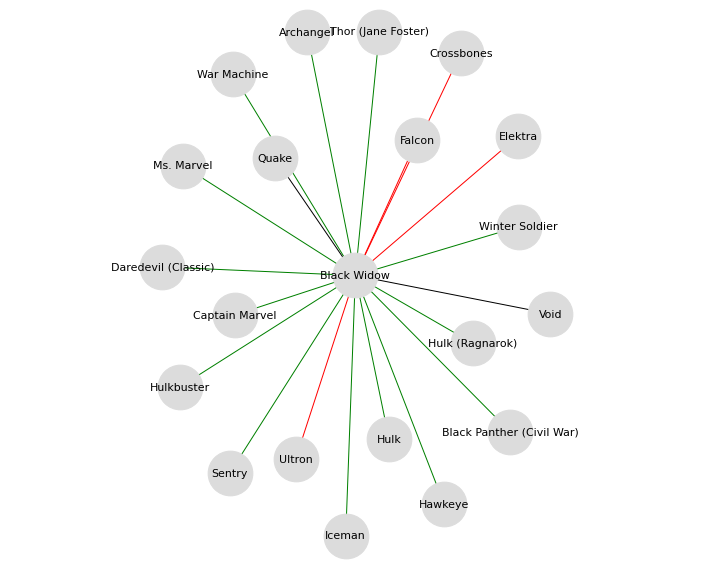

In [17]:
# initialize plot
fig, ax = plt.subplots(figsize=(10, 8))

# Initialize a graph object
G = nx.from_pandas_edgelist(msn_blackwidow,
                            'Char1_Name', 
                            'Char2_Name',
                            edge_attr=["Relation","Relation Sentiment"])

# Draw using a spring layout
nx.draw_spring(G,with_labels=True,
               edge_color=[msn_blackwidow["color"][i] for i in list(range(len(msn_blackwidow)))],
               node_color = "gainsboro",
              node_size = 2000,
              font_size=11)

# Resize figure for label readibility
fig.tight_layout()
plt.axis("off")
plt.margins(x=0.4)
plt.show()

# Other use cases

## `Connected components`
* Cluster groups according to feature similarities (e.g., same mobile number or address)
* Webs of accounts or channels used by criminal groups
* Transportation clusters

In [18]:
# load in data
cities = pd.read_csv("https://github.com/mkbunyi/Data-Viz-Tutorial-NetworkX/raw/main/distances.csv")
cities.head()

node1      node2  distance
0  Mannheim  Frankfurt        85
1  Mannheim  Karlsruhe        80
2    Erfurt   Wurzburg       186
3   Munchen    Numberg       167
4   Munchen   Augsburg        84

In [19]:
# create graph object along with nodes and edges
g = nx.Graph()
for edge in range(len(cities)):
    g.add_edge(cities["node1"][edge],
               cities["node2"][edge], 
               weight = cities["distance"][edge])

#### `connected_components` function to identify distinct sub-groups

In [20]:
for i, x in enumerate(nx.connected_components(g)):
    print("cc"+str(i)+":",x)

cc0: {'Augsburg', 'Stuttgart', 'Frankfurt', 'Munchen', 'Kassel', 'Numberg', 'Erfurt', 'Karlsruhe', 'Mannheim', 'Wurzburg'}
cc1: {'Mumbai', 'Delhi', 'Kolkata', 'Bangalore'}
cc2: {'TX', 'NY', 'ALB'}


#### Visualization
`'spring layout'`: set `k` as the optimal distance between nodes. The higher the value for `k`, the larger the distance between nodes.

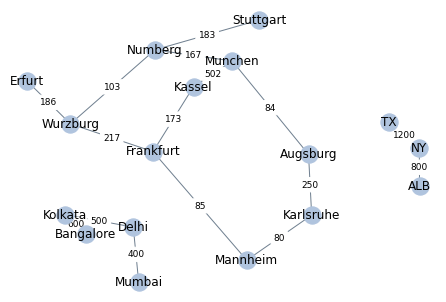

In [21]:
# set layout
pos = nx.spring_layout(g, k=5, seed=10)

# plot the network
nx.draw(g,pos,
        with_labels = True,  #labels nodes
        node_color='lightsteelblue',
        edge_color='slategrey')

# label edges (distance between cities)
edge_labels = nx.get_edge_attributes(g,'weight')
nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels,
                            font_size=9,rotate=False)

plt.show()

### Shortest path
e.g.: Google Maps, grocery shopping, LinkedIn connections

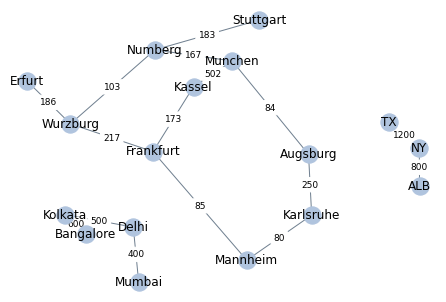

In [22]:
print(nx.shortest_path_length(g, 'Frankfurt','Stuttgart',weight='weight'))
print(nx.shortest_path(g, 'Frankfurt','Stuttgart',weight='weight'))

503
['Frankfurt', 'Wurzburg', 'Numberg', 'Stuttgart']


### Pagerank
This algorithm measures node importance based on the number and quality of its (incoming and outgoing) links. Its use cases include:
* Ranking of websites, tweets, or Facebook users
* Most influential papers based on citations
* Central actors in organized criminal networks

<b> <center> Sample graph showing Pageranking within a Facebook user network  </center> </b>

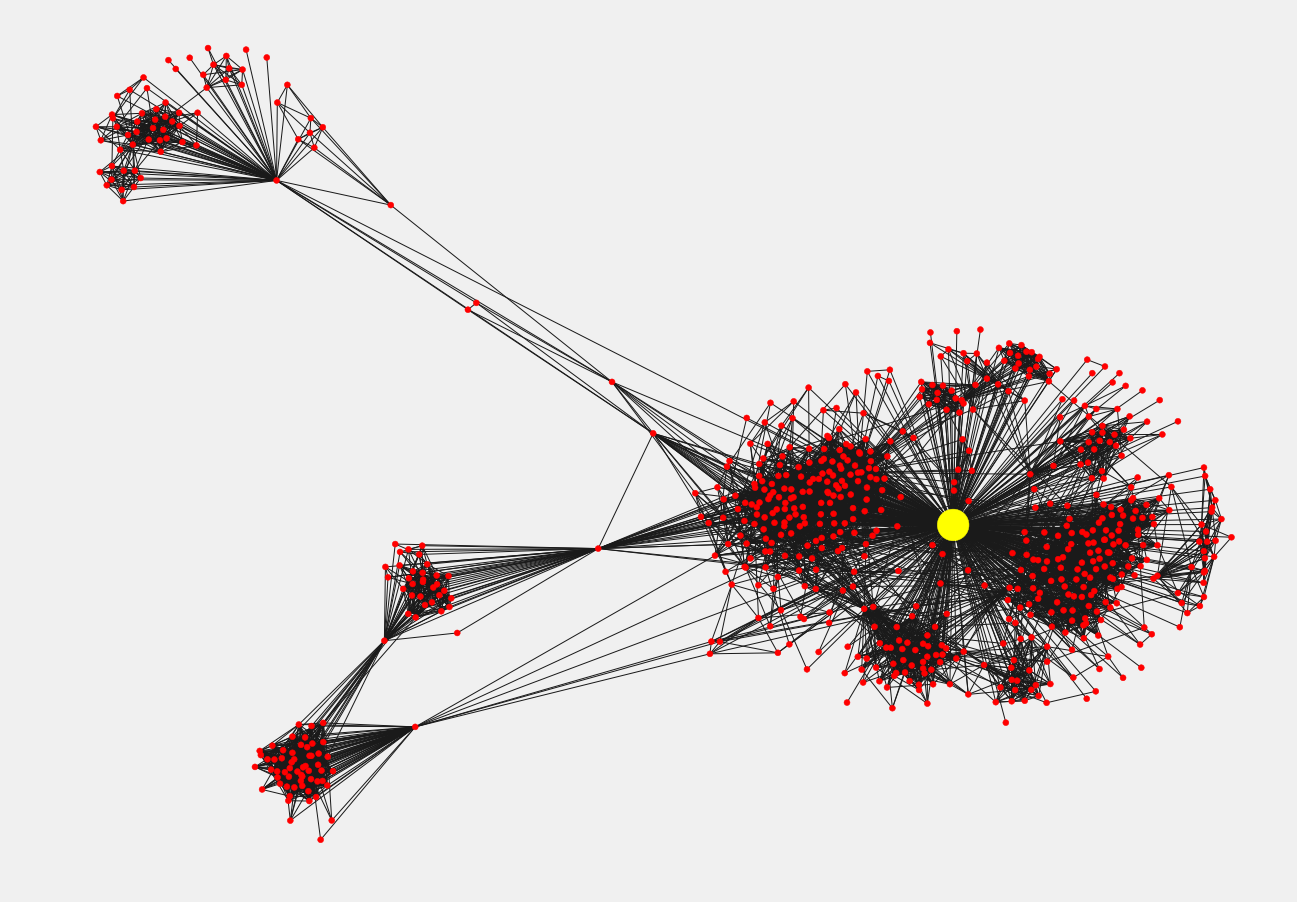

#### 3. Centrality measures
NetworkX covers various [centrality measures](https://networkx.org/documentation/stable/reference/algorithms/centrality.html?highlight=centrality), such as:

[**Degree Centrality.**](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality)
- based on number of links 
- crude popularity measure 
- Use cases: 
    - [Online auction fraud detection](https://neo4j.com/developer/graph-data-science/centrality-graph-algorithms/#degree-centrality)

[**Closeness Centrality.**](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality) 
- distance from a node to all other nodes 
- favor nodes that have the shortest average distance to all other nodes
- Use cases:
    - important actors within organizational networks (e.g., [terrorist groups)](http://www.orgnet.com/MappingTerroristNetworks.pdf)
    - [spread of infections](http://www.analytictech.com/borgatti/papers/centflow.pdf)
    - [key words/phrases within a document](https://www.aclweb.org/anthology/I/I13/I13-1102.pdf).

[**Betweenness Centrality.**](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality) 
- number of times that node is included in the shortest path between two other nodes
- ability to bridge clusters within the network
- Use cases:
    - [service delivery (e.g., shipping, telecommunications)](http://www.analytictech.com/borgatti/papers/centflow.pdf)
    - [influencers critical in ensuring organizational stability](http://archives.cerium.ca/IMG/pdf/Morselli_and_Roy_2008_.pdf)
    - [improving social media reach](ftp://ftp.umiacs.umd.edu/incoming/louiqa/PUB2012/RecMB.pdf).

<b> <center> Sample graph showing betweenness centrality within a Facebook user network </center> </b>

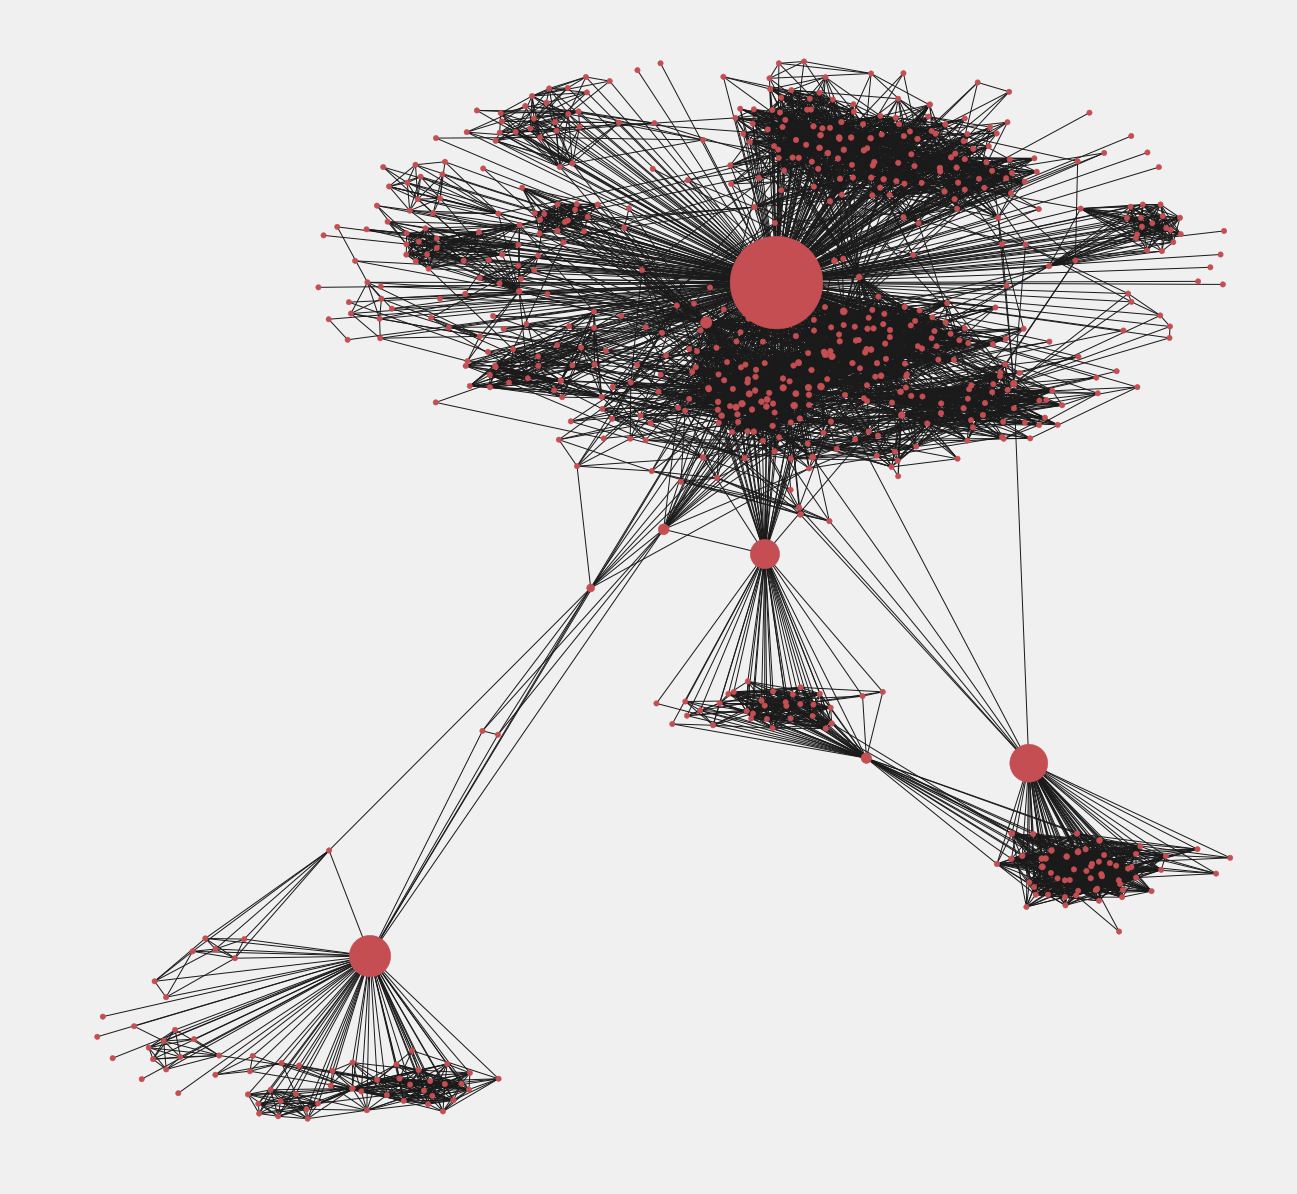